In [1]:
import json
import PIL
import numpy as np
import caffe
from caffe.proto import caffe_pb2

## List of Json file
- appleFace.json
- appleLeftEye.json
- appleRightEye.json
- dotInfo.json
- faceGrid.json
- frames.json
- info.json
- motion.json
- screen.json

In [2]:
with open('appleFace.json') as data_file:    
    faceJson = json.load(data_file)
    
with open('appleLeftEye.json') as data_file:    
    leftEye = json.load(data_file)
    
with open('appleRightEye.json') as data_file:    
    rightEye = json.load(data_file)

with open('faceGrid.json') as data_file:    
    facegrid = json.load(data_file)

def to_item_value(items, index):
    if items['IsValid'][index]:
        dic = {
            'x': items['X'][index],
            'y': items['Y'][index],
            'width': items['W'][index],
            'height': items['H'][index]
        }
        return dic
    else:
        return 0

print(faceJson.keys())
# print(leftEye.keys())
# print(rightEye.keys())
# print(facegrid.keys())

[u'Y', u'H', u'IsValid', u'W', u'X']


(480, 640)


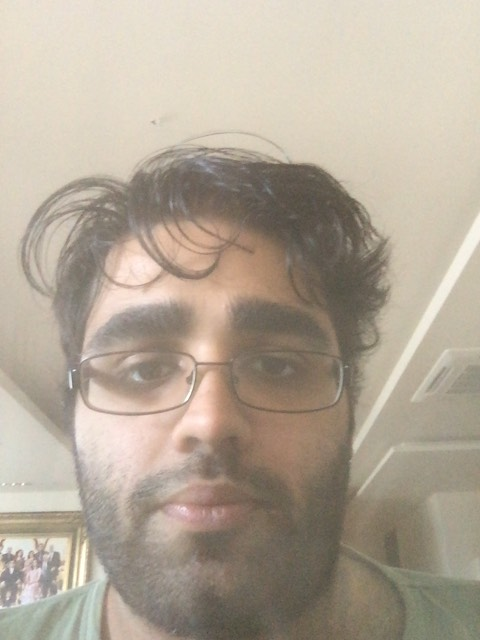

In [3]:
im = PIL.Image.open('./frames/00000.jpg')
print(im.size)
im

(u'Y', 230.037120412)
(u'H', 343.669759177)
(u'IsValid', 1)
(u'W', 343.678719177)
(u'X', 38.1526404115)
(344, 344, 3)


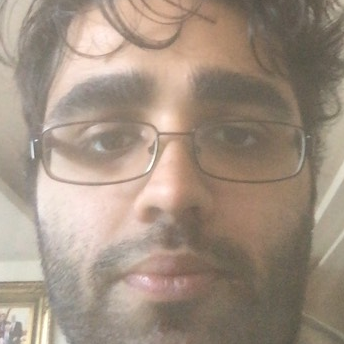

In [4]:
for key, values in faceJson.items():
    print(key, values[0])
face_data = to_item_value(faceJson, 0)
# face = im.crop((38, 230, 343+38, 343+230))
face = im.crop((face_data['x'], face_data['y'], face_data['width']+face_data['x'], face_data['height']+face_data['y']))
arrayface = np.array(face)
print(arrayface.shape)
# print(arrayface)
face

(u'Y', 79.037153815)
(u'H', 103.103613281)
(u'IsValid', 1)
(u'W', 103.103613281)
(u'X', 166.684172745)
(103, 103, 3)


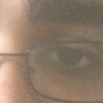

In [5]:
for key, values in leftEye.items():
    print(key, values[0])
leftEyeImage = face.crop((166, 79, 103+166, 79+103))

arrayLeft = np.array(leftEyeImage)
print(arrayLeft.shape)
leftEyeImage

(u'Y', 89.3475151431)
(u'H', 103.103613281)
(u'IsValid', 1)
(u'W', 103.103613281)
(u'X', 32.6494754792)
(103, 103, 3)


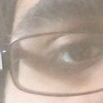

In [6]:
for key, values in rightEye.items():
    print(key, values[0])
rightEyeImage = face.crop((32, 89, 103+32, 103+89))

arrayRight = np.array(rightEyeImage)
print(arrayRight.shape)
rightEyeImage

### Check faceGrid

These values describe the "face grid" input features, which were generated from the Apple face detections. Within a 25 x 25 grid of 0 values, these parameters describe where to draw in a box of 1 values to represent the position and size of the face within the frame.


In [7]:
def face_grid_param_to_array(x, y, width, height):
    array = [0]*625
    for i in range(625):
        row = i / 25 + 1
        col = i % 25 + 1
        if row >= y and row < y+height and col >= x and col < x+width:
            array[i] = 1
    
    return array
faceGridArray = face_grid_param_to_array(6, 10, 13, 13)

for i in range(25):
    print(faceGridArray[i*25:(i+1)*25])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0,

In [15]:
face_mean_blob = caffe_pb2.BlobProto()
with open('mean_images/mean_face_224.binaryproto') as f:
    face_mean_blob.ParseFromString(f.read())
face_mean_array = np.asarray(face_mean_blob.data, dtype=np.float32).reshape(
    (face_mean_blob.channels, face_mean_blob.height, face_mean_blob.width))

right_mean_blob = caffe_pb2.BlobProto()
with open('mean_images/mean_right_224.binaryproto') as f:
    right_mean_blob.ParseFromString(f.read())
left_mean_array = np.asarray(right_mean_blob.data, dtype=np.float32).reshape(
    (right_mean_blob.channels, right_mean_blob.height, right_mean_blob.width))

left_mean_blob = caffe_pb2.BlobProto()

with open('mean_images/mean_left_224_new.binaryproto') as f:
    left_mean_blob.ParseFromString(f.read())
right_mean_array = np.asarray(left_mean_blob.data, dtype=np.float32).reshape(
    (left_mean_blob.channels, left_mean_blob.height, left_mean_blob.width))

caffe.set_mode_cpu()
net = caffe.Net('itracker_deploy.prototxt',
                'snapshots/itracker25x_iter_92000.caffemodel', caffe.TEST)

# net.blobs['image_face'].reshape(1, 3, 224, 224)
# net.blobs['image_left'].reshape(1, 3, 224, 224)
# net.blobs['image_right'].reshape(1, 3, 224, 224)
# net.blobs['facegrid'].reshape(1, 625, 1, 1)

# net.reshape()

# print(net.blobs['image_face'].shape())


image_tranformer = caffe.io.Transformer({'image_face': net.blobs['image_face'].data.shape,
'image_left': net.blobs['image_left'].data.shape, 
'image_right': net.blobs['image_right'].data.shape
}
)
image_tranformer.set_mean('image_face', face_mean_array)
image_tranformer.set_transpose('image_face', (2, 0, 1))
# image_tranformer.set_raw_scale('image_face', 255)
image_tranformer.set_channel_swap('image_face', (2,1,0))

image_tranformer.set_mean('image_left', left_mean_array)
image_tranformer.set_transpose('image_left', (2, 0, 1))
# image_tranformer.set_raw_scale('image_left', 255)
image_tranformer.set_channel_swap('image_left', (2,1,0))

image_tranformer.set_mean('image_right', right_mean_array)
image_tranformer.set_transpose('image_right', (2, 0, 1))
# image_tranformer.set_raw_scale('image_right', 255)
image_tranformer.set_channel_swap('image_right', (2,1,0))


net.blobs['image_face'].data[...] = image_tranformer.preprocess('image_face', arrayface)
net.blobs['image_left'].data[...] = image_tranformer.preprocess('image_left', arrayLeft)
net.blobs['image_right'].data[...] = image_tranformer.preprocess('image_right', arrayRight)
net.blobs['facegrid'].data[...] = np.array(faceGridArray).reshape((1, 625, 1, 1))

out = net.forward()
print out['fc3']

[[ 0.57331556 -5.78915644]]


In [9]:
with open('dotInfo.json') as data_file:    
    dot_info = json.load(data_file)
for key, values in dot_info.items():
    print(key, values[0])

(u'YCam', -6.0055)
(u'XPts', 160)
(u'XCam', 1.064)
(u'DotNum', 0)
(u'Time', 0.205642)
(u'YPts', 284)


In [10]:
(0.16201632-1.064)**2
(6.44785357-6.0055)**2
np.sqrt((0.16201632-1.064)**2 + (5.75408888-6.0055)**2)

0.93636644015363801

In [24]:
from matplotlib.pyplot import imshow
%matplotlib inline

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt( (x1-x2)**2 + (y1-y2)**2)

from os import listdir
from os.path import isfile, join
onlyfiles = sorted([f for f in listdir('./frames') if isfile(join('./frames', f))])

valid_count = 0
total_distance = 0
for i in range(len(onlyfiles)):
# for i in range(1):
    face_data = to_item_value(faceJson, i)
    left_eye_data = to_item_value(leftEye, i)
    right_eye_data = to_item_value(rightEye, i)
    face_grid_data = to_item_value(facegrid, i)
    if(face_data and left_eye_data and right_eye_data):
        valid_count += 1
        fullImage = PIL.Image.open('./frames/'+onlyfiles[i])
        face_crop_image = fullImage.crop((face_data['x']
                                          , face_data['y']
                                    , face_data['width']+face_data['x']
                                          , face_data['height']+face_data['y']))

        left_eye_crop_image = face_crop_image.crop((left_eye_data['x']
                                                    , left_eye_data['y']
                                              , left_eye_data['width']+left_eye_data['x']
                                                    , left_eye_data['height']+left_eye_data['y']))
        
        right_eye_crop_image = face_crop_image.crop((right_eye_data['x']
                                                     , right_eye_data['y']
                                              , right_eye_data['width']+right_eye_data['x']
                                                     , right_eye_data['height']+right_eye_data['y']))
    
        face_grid_preprocessed = face_grid_param_to_array(face_grid_data['x']
                                                          , face_grid_data['y'],
                                                         face_grid_data['width']
                                                          , face_grid_data['height'])
        
        face_crop_array = np.array(face_crop_image)
        left_eye_crop_array = np.array(left_eye_crop_image)
        right_eye_crop_array = np.array(right_eye_crop_image)
        
        net.blobs['image_face'].data[...] = image_tranformer.preprocess('image_face', face_crop_array)
        net.blobs['image_left'].data[...] = image_tranformer.preprocess('image_left', left_eye_crop_array)
        net.blobs['image_right'].data[...] = image_tranformer.preprocess('image_right', right_eye_crop_array)
        net.blobs['facegrid'].data[...] = np.array(face_grid_preprocessed).reshape((1, 625, 1, 1))
        net.forward()
        print(i)
        result_x, result_y = net.blobs['fc3'].data[0]
        dot_pos_x, dot_pos_y = dot_info['XCam'][i], dot_info['YCam'][i]
        print(result_x, result_y, dot_pos_x, dot_pos_y)
        dis = euclidean_distance(result_x, result_y, dot_pos_x, dot_pos_y)
        total_distance += dis
total_distance /= valid_count

print("total valid = %d" %valid_count)
print(total_distance)

0
(0.51640093, -5.4967074, 1.064, -6.0055)
1
(3.4297426, -4.1187482, 1.064, -6.0055)
2
(3.4182975, -4.446568, 1.064, -6.0055)
3
(2.4123387, -8.1242428, 1.064, -6.0055)
4
(2.0849273, -6.3229117, 3.25148487607, -1.99307341188)
5
(2.1593101, -3.6981311, 3.25148487607, -1.99307341188)
6
(3.4809499, -3.4291661, 3.25148487607, -1.99307341188)
7
(3.7762551, -2.0431898, 3.25148487607, -1.99307341188)
8
(3.8640299, -5.5249166, 3.25775, -10.4752535211)
9
(3.5378129, -3.9844317, 3.25775, -10.4752535211)
10
(1.533832, -7.5047522, 3.25775, -10.4752535211)
11
(1.5011469, -8.38908, 3.25775, -10.4752535211)
12
(1.7065976, -6.4828582, 2.80313558796, -9.60437014601)
13
(3.6802759, -5.5106621, 2.80313558796, -9.60437014601)
14
(2.2663453, -6.4114237, 2.80313558796, -9.60437014601)
15
(3.3949103, -6.0403681, 2.80313558796, -9.60437014601)
16
(0.97415954, -6.9217796, 1.54094050297, -5.78701453636)
17
(2.0255923, -4.9657736, 1.54094050297, -5.78701453636)
18
(1.6668489, -5.4861293, 1.54094050297, -5.7870145

# Note
current error 2.37817473633
[[ 0.57331556 -5.78915644]]

In [22]:
print(face == face_crop_image)
print(left_eye_crop_image == leftEyeImage)
print(right_eye_crop_image == rightEyeImage)
print(face_grid_preprocessed == faceGridArray)

True
False
False
True
